A partir de la base de datos de MNIST implementar un autoencoder que permita\
eliminar el ruido en las imágenes de dígitos manuscritos. Preprocesar los datos\
para que la imagen 𝐼 ∈ [0, 1]. Agregar un ruido con una distribución Gaussiana\
de media 0 y std=0.5 y utilizar la función clip para fijar los valores nuevamente\
entre [0,1].

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras

In [130]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [129]:
def preprocess(X, noise=False):
    X /= 255.

    if noise:
        noise = np.random.normal(0, .5, size=X.shape)
        return np.clip(X+noise, 0, 1)
    else:
        return X


In [131]:
x_train_n = preprocess(x_train.astype(float), noise=True)
x_test_n = preprocess(x_test.astype(float), noise=True)
x_train = preprocess(x_train.astype(float))
x_test = preprocess(x_test.astype(float))

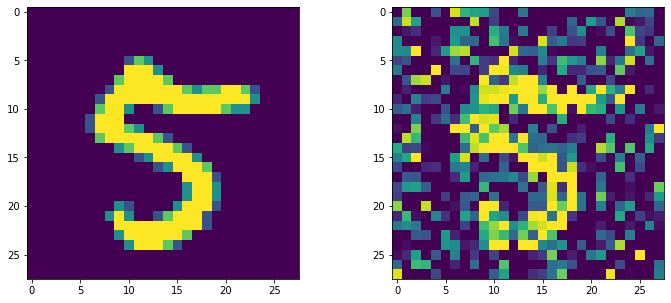

In [132]:
idx = 512
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax1.imshow(x_train[idx])
ax2.imshow(x_train_n[idx])

Autoencoder

In [133]:
keras.backend.clear_session()

reg = keras.regularizers.L2(l2=1e-5)

input = keras.layers.Input(shape=(28,28))
flat = keras.layers.Flatten()(input)

l1 = keras.layers.Dense(512, activation='relu', kernel_regularizer=reg)(flat)
l2 = keras.layers.Dense(256, activation='relu', kernel_regularizer=reg)(l1)
l3 = keras.layers.Dense(128, activation='relu', kernel_regularizer=reg)(l2)
l4 = keras.layers.Dense(256, activation='relu', kernel_regularizer=reg)(l3)
l5 = keras.layers.Dense(512, activation='relu', kernel_regularizer=reg)(l4)

l6 = keras.layers.Dense(784, activation='sigmoid', kernel_regularizer=reg)(l5)
output = keras.layers.Reshape(target_shape=(28,28))(l6)

model = keras.models.Model(inputs=input, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584

In [134]:
opt = keras.optimizers.Adam(learning_rate=.0005)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['mse'])

hist = model.fit(x_train_n, x_train, validation_data=(x_test_n, x_test), 
                 epochs=15, batch_size=200, verbose=1)


Epoch 1/15
300/300 [==============================] - 15s 47ms/step - loss: 0.2479 - mse: 0.0565 - val_loss: 0.1826 - val_mse: 0.0355
Epoch 2/15
300/300 [==============================] - 14s 47ms/step - loss: 0.1686 - mse: 0.0307 - val_loss: 0.1570 - val_mse: 0.0270
Epoch 3/15
300/300 [==============================] - 14s 47ms/step - loss: 0.1518 - mse: 0.0253 - val_loss: 0.1457 - val_mse: 0.0234
Epoch 4/15
300/300 [==============================] - 14s 46ms/step - loss: 0.1433 - mse: 0.0226 - val_loss: 0.1394 - val_mse: 0.0214
Epoch 5/15
300/300 [==============================] - 14s 46ms/step - loss: 0.1378 - mse: 0.0209 - val_loss: 0.1355 - val_mse: 0.0202
Epoch 6/15
300/300 [==============================] - 14s 47ms/step - loss: 0.1338 - mse: 0.0197 - val_loss: 0.1320 - val_mse: 0.0191
Epoch 7/15
300/300 [==============================] - 14s 47ms/step - loss: 0.1308 - mse: 0.0187 - val_loss: 0.1308 - val_mse: 0.0188
Epoch 8/15
300/300 [==============================] - 14s 46ms

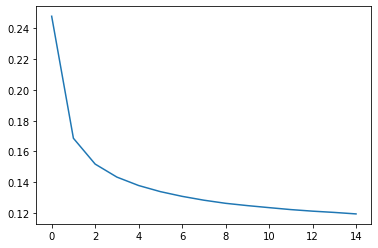

In [135]:
plt.plot(hist.history['loss'])

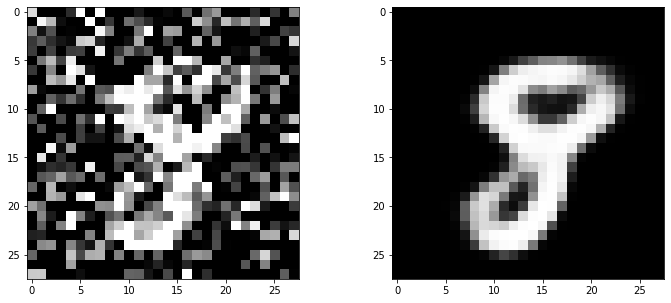

In [141]:
idx = 5003
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ax1.imshow(x_test_n[idx], cmap='gray')
ax2.imshow(model.predict(x_test_n[idx:idx+1])[0], cmap='gray')